In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data_Science_CODERHOUSE'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data_Science_CODERHOUSE


#La pandemia y el desempleo en España
Todos estamos familiarizados con las complicaciones que causó a nivel mundial la pandemia generada por el virus Covid-19, teniendo un enorme impacto en las areas económicas, sociales, de salud y políticas. Tuvo tan gran impacto que los medios estuvieron plagados de información constante y poco confiable a lo largo de todo este fenómeno, complicando así a la persona corriente de asimilar el efecto real en la sociedad.
Lo que yo busque es realizar un análisis simple y detallado de como afectó la pandemia en el desempleo a través de España, durante el año 2020. Para lo cual procedí a analizar la variación de desempleo en las distintas comunidades autónomas de España durante dicho año. Para ello utilicé un data estadística proveniente del PSSE (Public Service of State Employment - Ministry of Labour and Social Economy) que registra los distintos paros que presentan los municipios en el país.

Dentro de este trabajo presto especial atención a que parte de la población afectó más este fenómeno, así como a que áreas de la economía. Para esto divido a este grupo según género y edad, y, a su vez, según a que área laboral pertenecian previamente al desempleo. Luego de un analisis general del aumento del desempleo sin discriminar, procedo a analizar cuáles son los grupos que se mantuvieron mas estables, cuáles presentan una mayor decadencia, así como cuales son aquellas comunidades mas afectadas.

Con esto se podrá observar en que momento del año atravesado por la pandemia se vió más intensamente afligida la población, y si a su vez hubo algún grupo dentro de esta, que se pueda identificar según los rasgos previamente descriptos, que se haya visto mas fuertemente afectada por este fenómeno.


#La gran brecha en el desempleo
Analicé mes a mes como aumentó el desempleo total de España, primero sin discriminar de ninguna forma, para asi poder analizar si hubo una tendencia de aumento general.

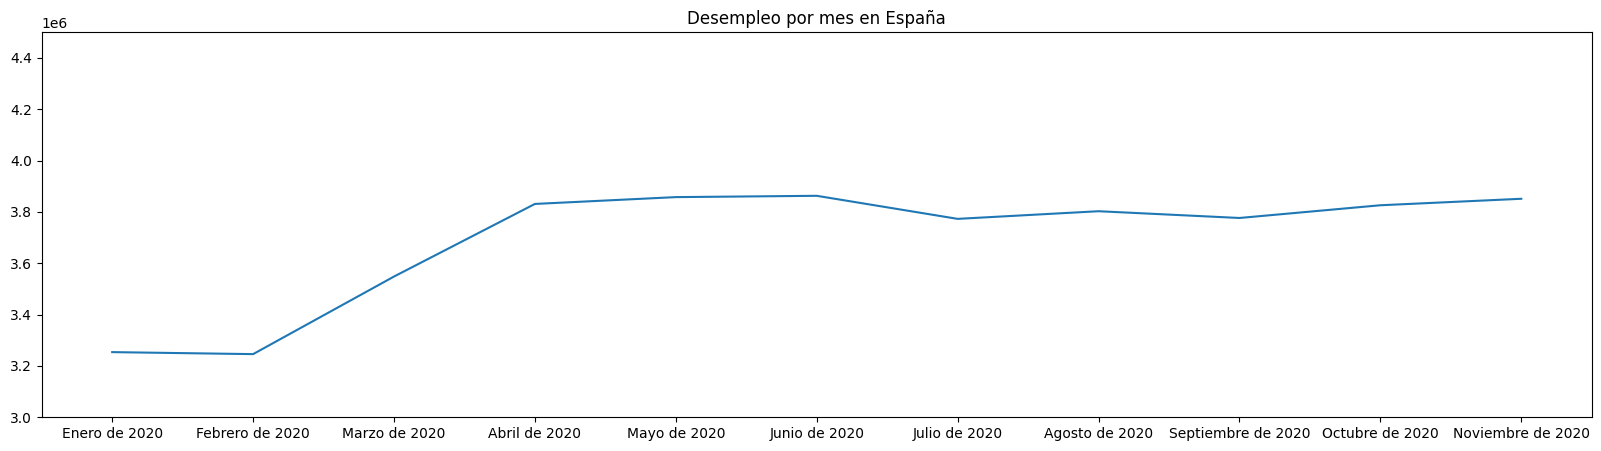

In [2]:
desempleo = pd.read_csv('Paro_por_municipios_2020.csv', sep = ',', encoding = 'latin')
desempleo_mes = desempleo[['mes', 'total Paro Registrado']].groupby(by = 'mes', sort = False).sum()
fig, ax = plt.subplots (figsize = (20, 5))
ax.plot(desempleo_mes)
ax.set_ylim ([3000000, 4500000])
ax.set_title ('Desempleo por mes en España')
plt.show()

Se puede observar que los primeros meses cuando la pandemia todavía no habia llegado a España el desempleo se mantiene constante. Sin embargo, de febrero a abril, meses en los que se declaro el aislamiento obligatorio se puede observar un salto considerablemente grande. No obstante, luego de la brecha entre febrero-abril no se puede apreciar una tendencia a aumentar, sino que logra mantener una buena estabilidad.

#Discriminación etaria y de género
Siempre es imporante poder observar a que parte de la sociedad afectan realmente los hechos acontecidos y si existen patrones observables dentro de la misma. Para esto separe el desempleo en distitntos grupos según genero y edad de las personas, comparando asi el desempleo y el desarrollo del mismo a lo largo del 2020.

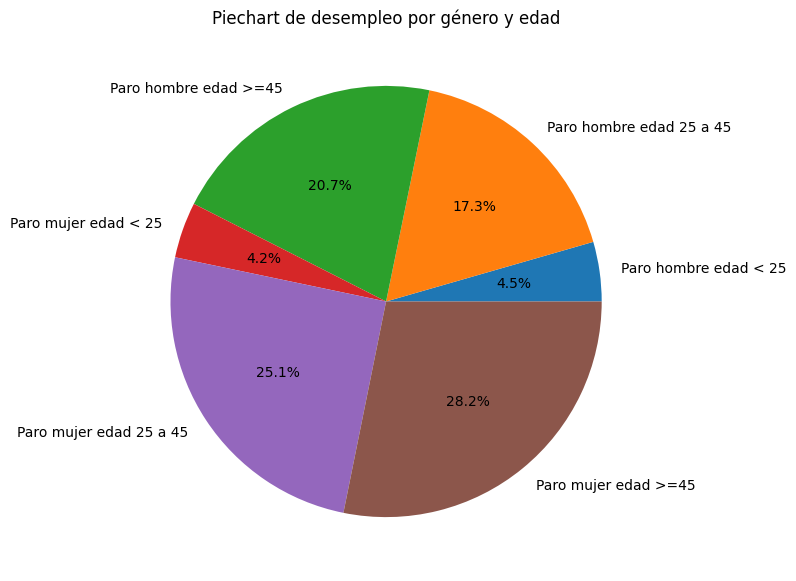

In [3]:
desempleo_genero_edad = pd.read_excel('Paro_por_municipios_2020_2.xlsx', usecols = ['Paro hombre edad < 25', 'Paro hombre edad 25 a 45', 'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 a 45', 'Paro mujer edad >=45'])
fig, ax = plt.subplots(figsize = (10, 7))
ax.pie(desempleo_genero_edad.sum(), labels = desempleo_genero_edad.sum().index, autopct = '%1.1f%%')
ax.set_title('Piechart de desempleo por género y edad')
plt.show()

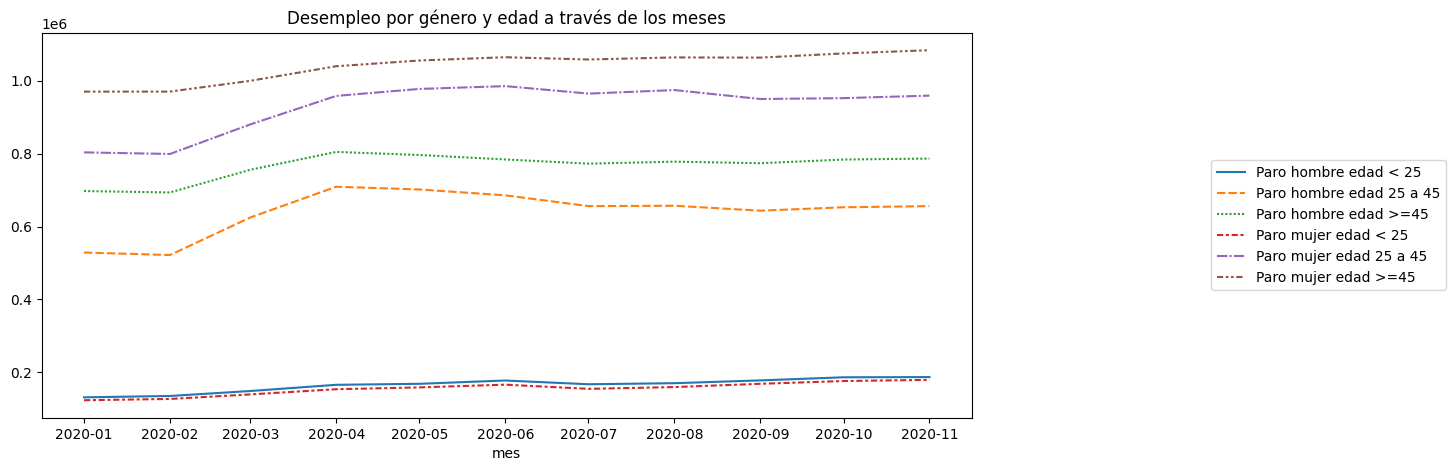

In [4]:
desempleo_mes_genero_edad = pd.read_excel('Paro_por_municipios_2020_2.xlsx', usecols = ['mes', 'Paro hombre edad < 25', 'Paro hombre edad 25 a 45', 'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 a 45', 'Paro mujer edad >=45']).groupby('mes', sort = False).sum()
fig, ax = plt.subplots (figsize = (12, 5))
sns.lineplot(data = desempleo_mes_genero_edad).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title ('Desempleo por género y edad a través de los meses')
plt.show()

A partir de este analisis se puede observar que aquellos que se vieron menos afectados por el abrupto salto en el desempleo son aquellas personas menores a 25 años, así como aquellas mas afligidas pertenecen al grupo entre 25 y 45 años de edad. También se nota, que este fenómeno no pareciera discriminar por género, ya que dentro del mismo grupo etario la tendencia pareciera ser la misma sin importar si el grupo es masculino o femenino.

#Áreas económicas afectadas
Así como es importante entender como afectó la pandemia a la sociedad como individuos, también es importante mirar a mayor escala como este desempleo afectó a la economía de las distintas áreas económicas y productivas de la sociedad. Para esto separé la información en "pari agricultura", "paro industria", "paro construcción", "paro servicios" y "paro sin empleo anterior", para poder analizar la diferencia de efecto en estas áreas.

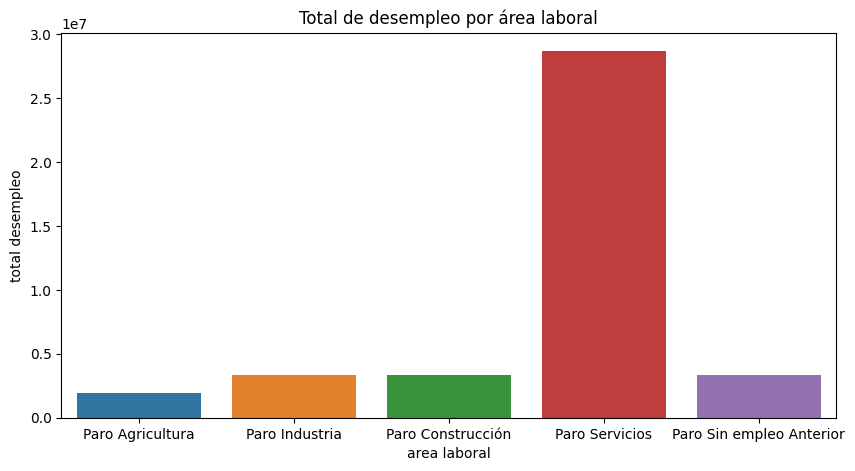

In [5]:
desempleo_total = desempleo[['Paro Agricultura', 'Paro Industria', 'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior']].sum().reset_index()
desempleo_total.rename({'index' : 'area laboral', 0 : 'total desempleo'}, axis = 'columns', inplace = True)
fig, ax = plt.subplots (figsize = (10, 5))
ax = sns.barplot(data = desempleo_total, x = 'area laboral', y = 'total desempleo')
ax.set_title('Total de desempleo por área laboral')
plt.show()

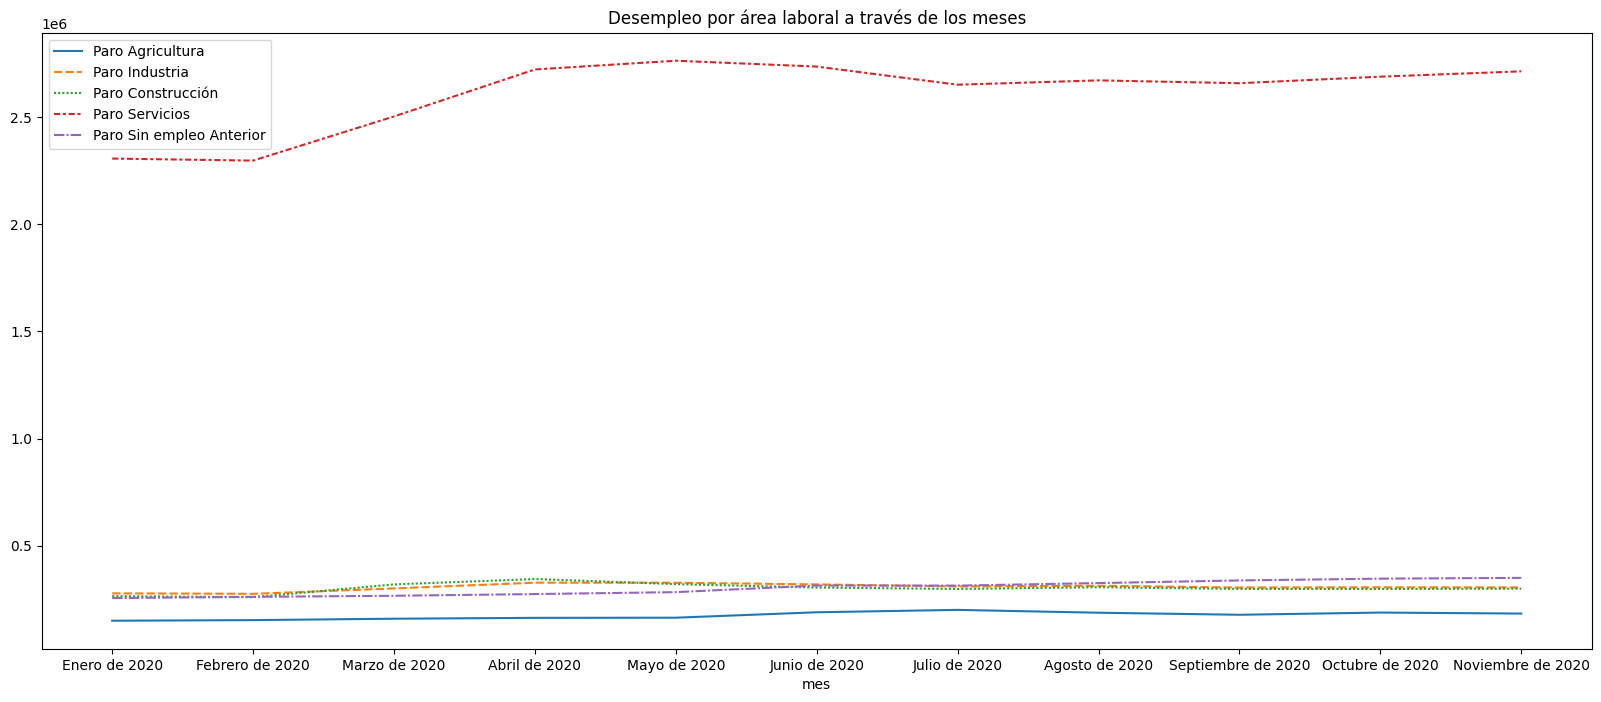

,Paro Agricultura,Paro Industria,Paro Construcción,Paro Servicios,Paro Sin empleo Anterior
mes,,,,,
Enero de 2020,150045,277744,264654,2305824,255586
Febrero de 2020,152900,275485,259835,2296339,261488
Marzo de 2020,159420,300679,319386,2502355,266472
Abril de 2020,163435,327511,344441,2721483,274333
Mayo de 2020,164145,327249,320724,2762267,283391
Junio de 2020,189487,319479,304797,2734948,314172
Julio de 2020,200595,310035,298241,2650385,313778
Agosto de 2020,187342,313016,306224,2670601,325631
Septiembre de 2020,177839,304921,298542,2657234,337949


In [6]:
desempleo_servicios = pd.read_csv('Paro_por_municipios_2020.csv', sep = ',', encoding = 'latin', usecols = ['mes', 'Paro Agricultura', 'Paro Industria', 'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior']).groupby('mes', sort = False).sum()
fig, ax = plt.subplots (figsize = (20, 8))
sns.lineplot(data = desempleo_servicios)
ax.set_title ('Desempleo por área laboral a través de los meses')
plt.show()
desempleo_servicios

Si bien en todas las áreas se puede apreciar un aumento en el desempleo aquella en la que se observa la mayor pendiente de desempleo generado a causa del aislamiento obligatorio es el área de servicios, que es a su vez, por gran margen, el área con mayor desempleo total. En las otras que se puede visualizar que siguen levemente la tendencia son la construcción y la industria, mientras que la agricultura y aquellos que no registran empleo anterior parecieran mantener un aumento mas lineal.

#Conclusiones

  Analizando los datos y gráficos presentados anteriormente uno puede conclucir que las medidas llevadas a cabo como prevención contra el Covid-19 generaron un desbalance en el desempleo de España, causando un aumento considerable del mismo, donde el mayor efecto fue sufrido por aquellas áreas laborales que se vieron obligadas a reducir o cerrar su producción debido al encierro obligatorio. Cabe detallar, que esta ola de desempleo, dentro de estas distinciones de área, pareciera haber afectado a la población de manera general, dado que no se pueden observar grandes diferencias del fenómeno dentro de grupos de distinta edad y/o género.